In [1]:
%matplotlib inline

reusing part of pre-trained model

Basically, you can grab a GluonCV pre-trained detection model and reset classes to a subset of
coco categories, and it will be instantly ready to use without any tuning.

First let's import some necessary libraries:



In [2]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

## Load a pretrained model

Let's get an Faster RCNN model trained on COCO
dataset with ResNet-50 backbone.



In [3]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_coco', pretrained=True)

## Pre-process an image
Similar to faster rcnn inference tutorial, we grab and preprocess a demo image



In [4]:
im_fname = r"D:\Harshil\My_work\ML\Projects\P_H_Object_detection\VOC\data\VOCdevkit\VOC2007\JPEGImages\000000000536.jpg"
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

## Reset classes to detect only  person and handbag 
Original COCO model has 80 classes



In [5]:
print('coco classes: ', net.classes)
net.reset_class(classes=['person', 'handbag'], reuse_weights=['person', 'handbag'])
# now net has 2 classes as desired
print('new classes: ', net.classes)

coco classes:  ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
new classes:  ['person', 'handbag']


## Inference and display



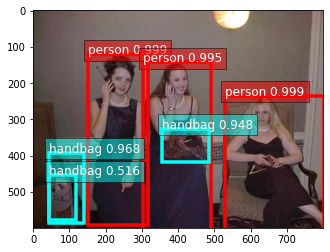

In [6]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

## Different models and mask

We can apply this strategy to SSD, YOLO and Mask-RCNN models
Now we can use mask rcnn and reset class to detect person and handbag only



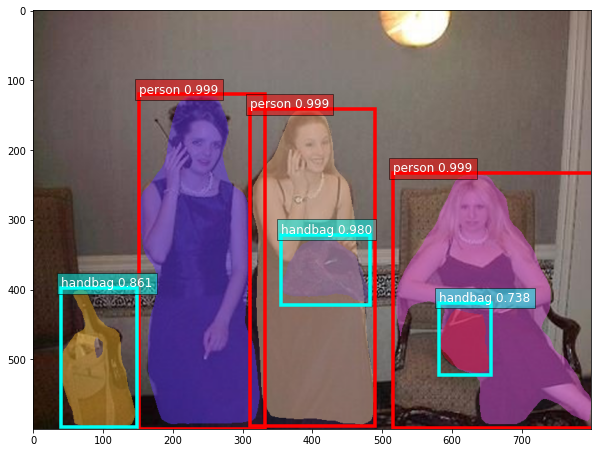

In [7]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)
net.reset_class(classes=['person','handbag'], reuse_weights=['person','handbag'])
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()